In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [5]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.

    # TODO HERE
    indices = np.arange(len(x_train))
    np.random.seed(0)
    np.random.shuffle(indices)
    folds_idx = np.array_split(indices, k)  # Allows indices to be an integer that does not equally divide the axis.
    folds_idx = np.array(folds_idx)
    
    k_fold_data = []
    for i in range(k):
        train_idx = [j for j in range(k) if i != j]
        k_fold_data.append([np.concatenate((folds_idx[train_idx]), axis=None), folds_idx[i]])
    
    return k_fold_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  5  6  7  9 12 13 14 15 16 17 19], Validation index: [ 8 10 11 18]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7  8 10 11 14 15 16 17 18], Validation index: [ 9 12 13 19]
Split: 3, Training index: [ 2  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19], Validation index: [ 0  1  3 15]
Split: 4, Training index: [ 0  1  3  7  8  9 10 11 12 13 14 15 16 17 18 19], Validation index: [2 4 5 6]
Split: 5, Training index: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 15 18 19], Validation index: [ 7 14 16 17]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [9]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [10]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search
kfold_data = cross_validation(x_train, y_train, k=5)
c_grid = [0.5, 1, 2, 4, 8, 16, 32]
gamma_grid = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
best_score = 0
grid_score = []
for i in range(len(c_grid)):
    li = []
    for j in range(len(gamma_grid)):
        clf = SVC(C=c_grid[i], gamma=gamma_grid[j], kernel='rbf')
        score = 0
        for train_idx, val_idx in kfold_data:
            clf.fit(x_train[train_idx], y_train[train_idx])
            y_pred = clf.predict(x_train[val_idx])
            score += accuracy_score(y_pred, y_train[val_idx])
        
        avg_score = score / len(kfold_data)
        li.append(avg_score)
        print(f'C={c_grid[i]}, gamma={gamma_grid[j]}, score = {avg_score}')
        if avg_score > best_score:
            best_score = avg_score
            best_c = c_grid[i]
            best_gamma = gamma_grid[j]
    
    grid_score.append(li)

best_parameters=(best_c, best_gamma)

C=0.5, gamma=0.0001, score = 0.9944285714285714
C=0.5, gamma=0.0005, score = 0.4967142857142857
C=0.5, gamma=0.001, score = 0.4967142857142857
C=0.5, gamma=0.005, score = 0.4967142857142857
C=0.5, gamma=0.01, score = 0.4967142857142857
C=0.5, gamma=0.05, score = 0.4967142857142857
C=0.5, gamma=0.1, score = 0.4967142857142857
C=1, gamma=0.0001, score = 0.9948571428571429
C=1, gamma=0.0005, score = 0.7362857142857143
C=1, gamma=0.001, score = 0.4967142857142857
C=1, gamma=0.005, score = 0.4967142857142857
C=1, gamma=0.01, score = 0.4967142857142857
C=1, gamma=0.05, score = 0.4967142857142857
C=1, gamma=0.1, score = 0.4967142857142857
C=2, gamma=0.0001, score = 0.9948571428571429
C=2, gamma=0.0005, score = 0.767
C=2, gamma=0.001, score = 0.4967142857142857
C=2, gamma=0.005, score = 0.4967142857142857
C=2, gamma=0.01, score = 0.4967142857142857
C=2, gamma=0.05, score = 0.4967142857142857
C=2, gamma=0.1, score = 0.4967142857142857
C=4, gamma=0.0001, score = 0.9948571428571429
C=4, gamma=0.0

In [11]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (1, 0.0001)


# Q3

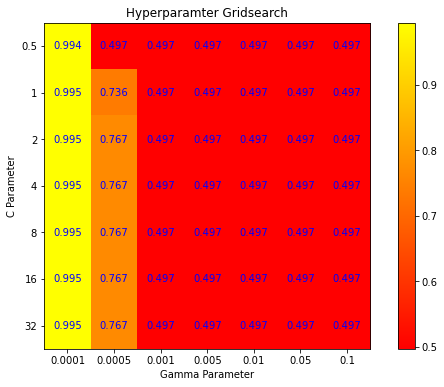

In [12]:
# Plot the grid search results of your SVM

# TODO HERE
plt.figure(figsize=(10, 6))
plt.imshow(grid_score, cmap='autumn', interpolation='nearest')
plt.xticks(np.arange(len(gamma_grid)), gamma_grid)
plt.yticks(np.arange(len(c_grid)), c_grid)
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
plt.title("Hyperparamter Gridsearch")
plt.colorbar()

for i in range(len(c_grid)):
    for j in range(len(gamma_grid)):
        plt.text(j, i, f'{grid_score[i][j]:.3f}', ha='center', va='center', color='blue')
    

plt.show()


## Q4

In [13]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
